In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df = pd.read_excel("World_development_mesurement.xlsx")

df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [3]:
df.shape

(2704, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [5]:
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [6]:
# Missing values count
df.isna().sum().sort_values(ascending=False)

Ease of Business          2519
Hours to do Tax           1288
Business Tax Rate         1281
Days to Start Business     986
Energy Usage               919
Lending Interest           824
CO2 Emissions              579
Tourism Outbound           471
Tourism Inbound            368
Health Exp % GDP           309
Health Exp/Capita          309
Infant Mortality Rate      260
Population 0-14            220
Population 65+             220
Population 15-64           220
GDP                        210
Internet Usage             173
Mobile Phone Usage         167
Life Expectancy Male       136
Life Expectancy Female     136
Birth Rate                 119
Population Urban            26
Number of Records            0
Population Total             0
Country                      0
dtype: int64

In [7]:
# Missing values percentage
(df.isna().mean() * 100).sort_values(ascending=False)

Ease of Business          93.158284
Hours to do Tax           47.633136
Business Tax Rate         47.374260
Days to Start Business    36.464497
Energy Usage              33.986686
Lending Interest          30.473373
CO2 Emissions             21.412722
Tourism Outbound          17.418639
Tourism Inbound           13.609467
Health Exp % GDP          11.427515
Health Exp/Capita         11.427515
Infant Mortality Rate      9.615385
Population 0-14            8.136095
Population 65+             8.136095
Population 15-64           8.136095
GDP                        7.766272
Internet Usage             6.397929
Mobile Phone Usage         6.176036
Life Expectancy Male       5.029586
Life Expectancy Female     5.029586
Birth Rate                 4.400888
Population Urban           0.961538
Number of Records          0.000000
Population Total           0.000000
Country                    0.000000
dtype: float64

In [8]:
df.duplicated().sum()

0

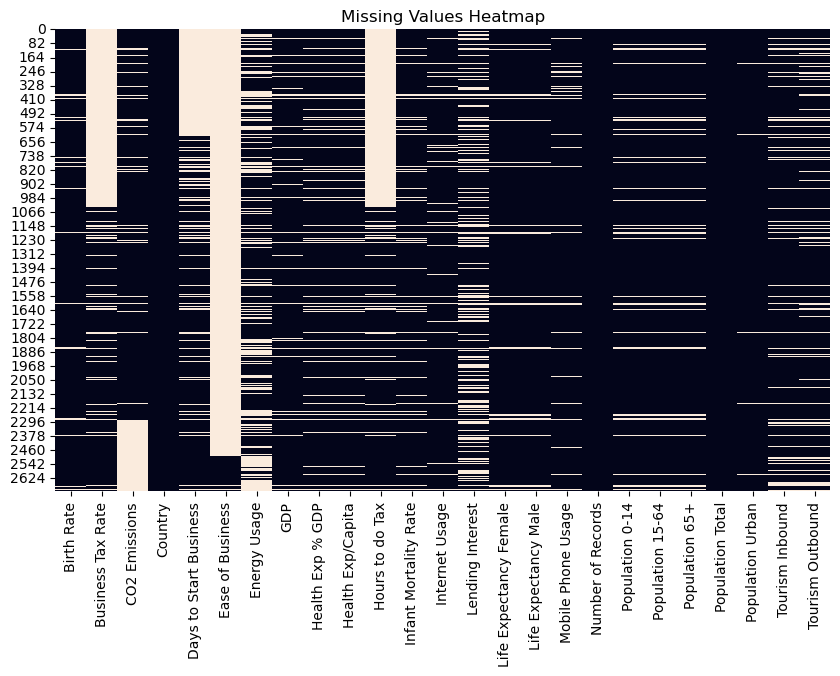

In [9]:
# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

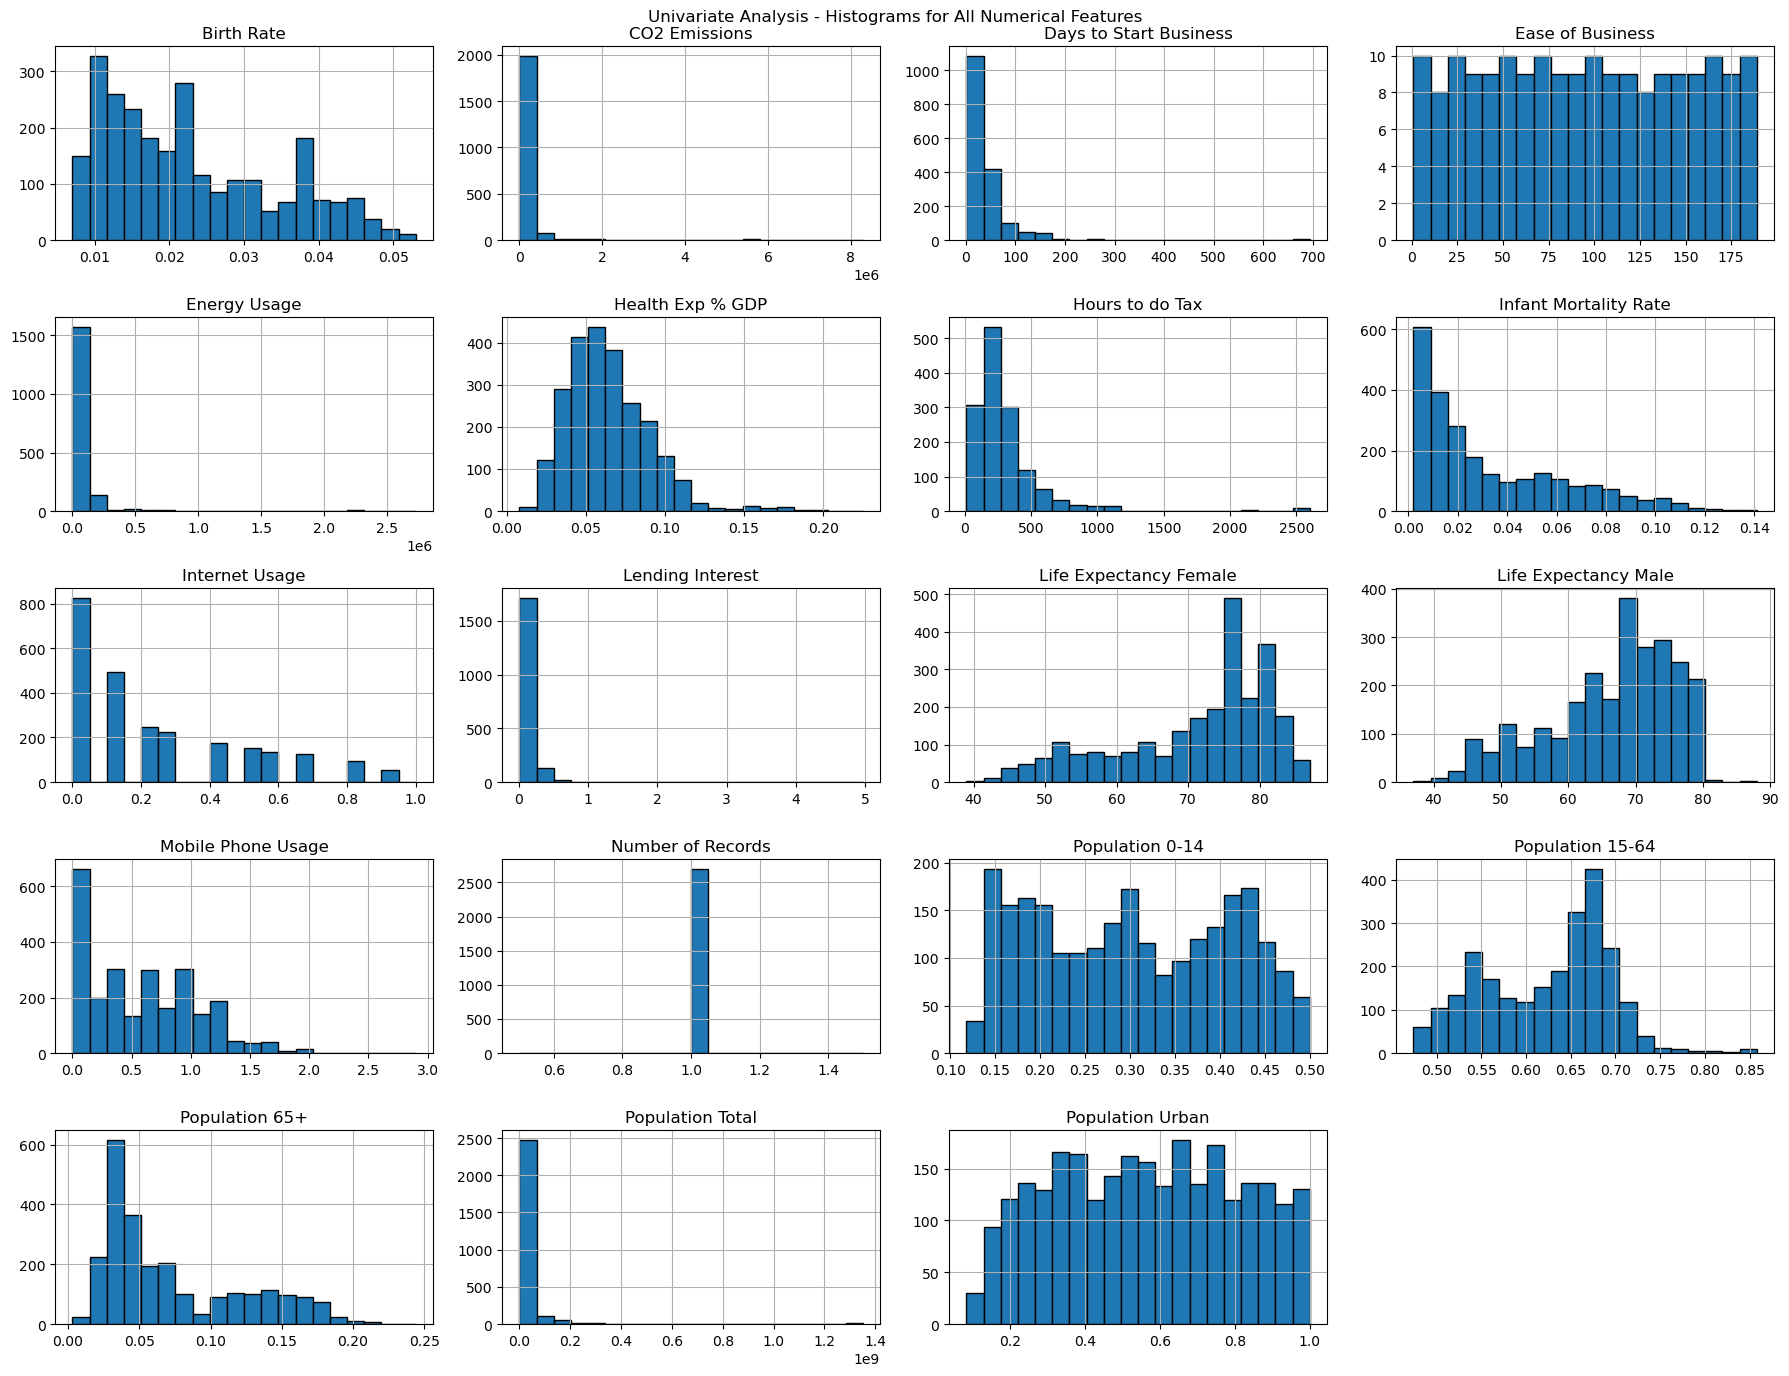

In [10]:


num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(
    figsize=(18, 14),
    bins=20,
    edgecolor='black'
)

plt.suptitle('Univariate Analysis - Histograms for All Numerical Features')
plt.tight_layout()
plt.show()

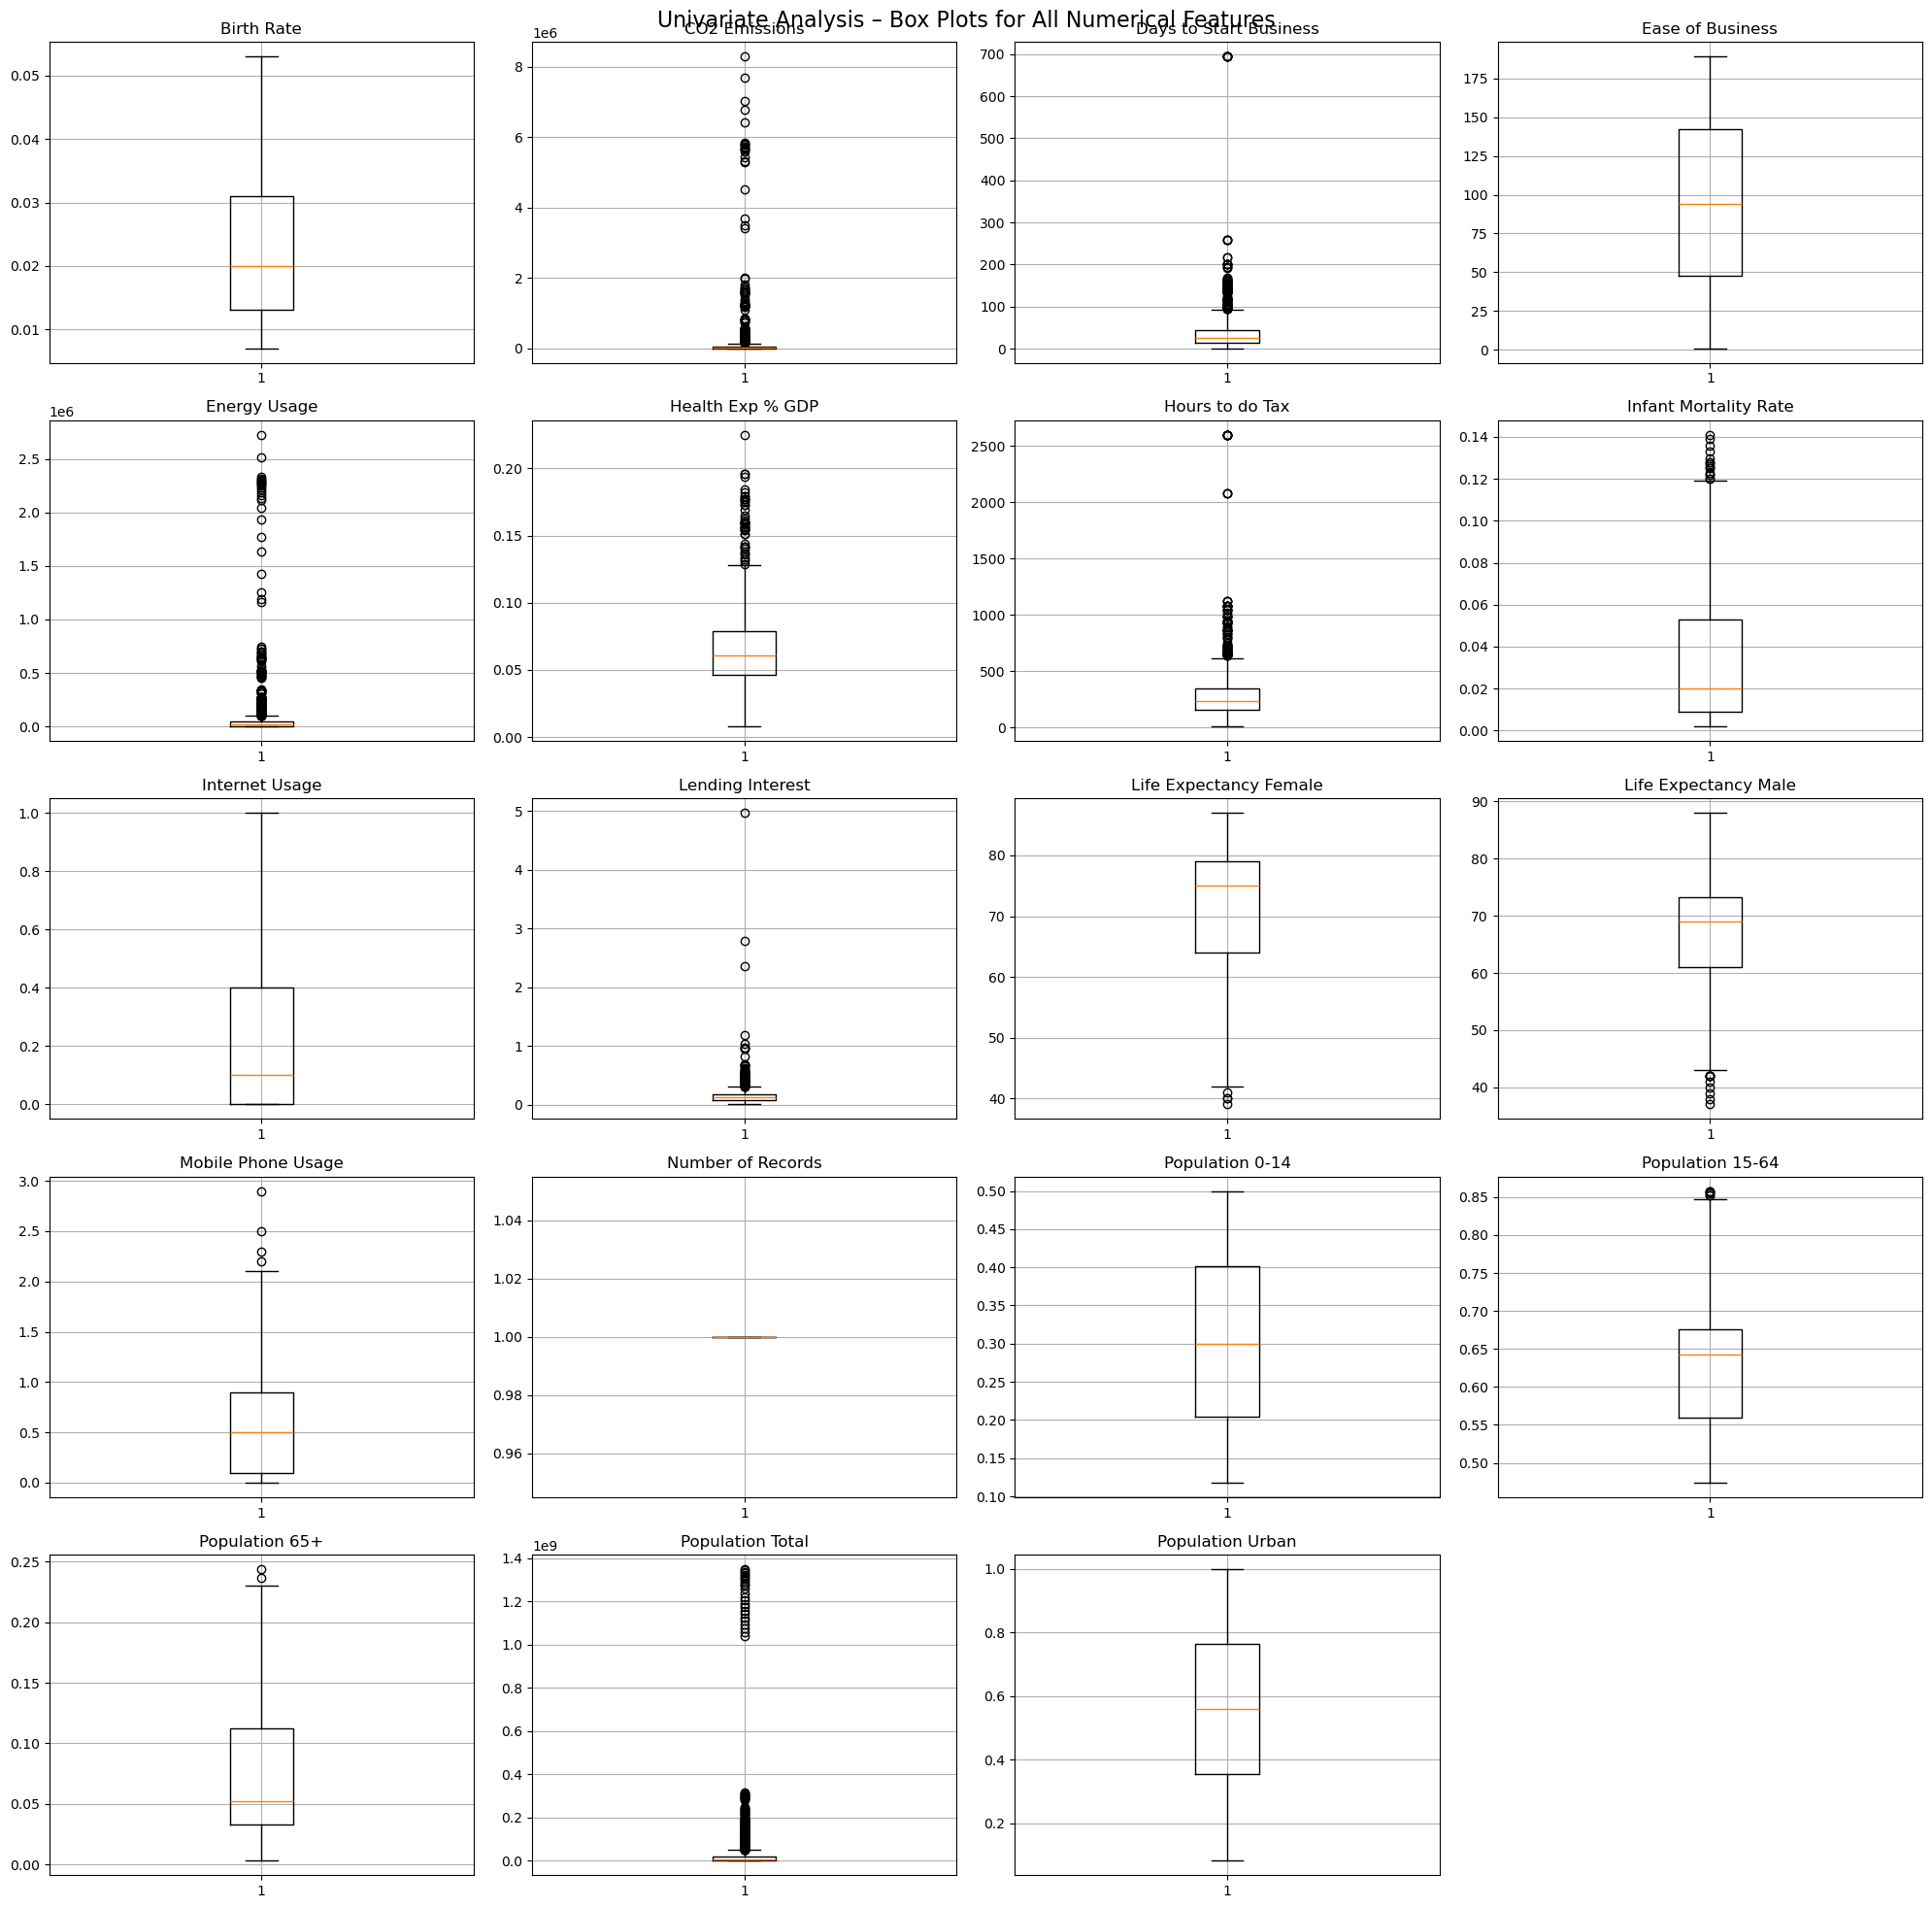

In [11]:

num_cols = df.select_dtypes(include=np.number).columns

n_cols = 4                         # number of plots per row
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col].dropna(), vert=True)
    axes[i].set_title(col)
    axes[i].grid(True)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Univariate Analysis – Box Plots for All Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


In [12]:
# removing symbols in this column as clustering cannot work on strings.
money_cols = ['GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']

for col in money_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('$', '', regex=False)
        .str.replace(',', '', regex=False)
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
df['Business Tax Rate'] = (
    df['Business Tax Rate']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

df['Business Tax Rate'] = pd.to_numeric(
    df['Business Tax Rate'], errors='coerce'
)

In [14]:
# number of unique info column wise
df.nunique()

Birth Rate                  47
Business Tax Rate          447
CO2 Emissions             1743
Country                    208
Days to Start Business     126
Ease of Business           185
Energy Usage              1721
GDP                       2494
Health Exp % GDP           145
Health Exp/Capita         1069
Hours to do Tax            280
Infant Mortality Rate      129
Internet Usage              11
Lending Interest           351
Life Expectancy Female      49
Life Expectancy Male        47
Mobile Phone Usage          26
Number of Records            1
Population 0-14            376
Population 15-64           298
Population 65+             208
Population Total          2699
Population Urban           822
Tourism Inbound           1650
Tourism Outbound          1457
dtype: int64

In [15]:
#droping column Number of Records because number of unique is 1 
df.drop(columns=['Number of Records'], inplace=True)

In [16]:
# putting all numerical column in one variable
numerical_col = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(f"numerical column : {numerical_col}")
print(f"number of numerical columns :{len(numerical_col)}")

numerical column : ['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban', 'Tourism Inbound', 'Tourism Outbound']
number of numerical columns :23


In [17]:
# putting all categorical column in one variable
categorical_col = df.select_dtypes(include=['object']).columns.tolist()
print(f"categorical column : {categorical_col}")
print(f"number of categorical columns :{len(categorical_col)}")

categorical column : ['Country']
number of categorical columns :1


In [18]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   float64
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   float64
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [20]:
# check for null values
df.isna().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [21]:
# identify columns with highest missing values
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isna().sum().values,
    'Missing_Percentage': missing_percentage.values
})
# sort by missing percentage in descending order
missing_sorted = missing_df.sort_values('Missing_Percentage', ascending=False)
print("Columns sorted by missing values:")
missing_sorted

Columns sorted by missing values:


,Column,Missing_Count,Missing_Percentage
5,Ease of Business,2519,93.158284
10,Hours to do Tax,1288,47.633136
1,Business Tax Rate,1281,47.374260
4,Days to Start Business,986,36.464497
6,Energy Usage,919,33.986686
13,Lending Interest,824,30.473373
2,CO2 Emissions,579,21.412722
23,Tourism Outbound,471,17.418639
22,Tourism Inbound,368,13.609467
8,Health Exp % GDP,309,11.427515


In [22]:
# decide threshold for dropping vs imputing
threshold = 50  # 50% threshold
print(f"Threshold for dropping columns: {threshold}%")
print("\nColumns to potentially drop (>50% missing):")
print(missing_sorted[missing_sorted['Missing_Percentage'] > threshold])

Threshold for dropping columns: 50%

Columns to potentially drop (>50% missing):
             Column  Missing_Count  Missing_Percentage
5  Ease of Business           2519           93.158284


In [23]:
# Plan imputation strategy for important columns
cols_to_impute = missing_sorted[(missing_sorted['Missing_Percentage'] > 0) & 
                                (missing_sorted['Missing_Percentage'] <= threshold)]['Column'].tolist()
print(f"Columns for potential imputation: {cols_to_impute}")

Columns for potential imputation: ['Hours to do Tax', 'Business Tax Rate', 'Days to Start Business', 'Energy Usage', 'Lending Interest', 'CO2 Emissions', 'Tourism Outbound', 'Tourism Inbound', 'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate', 'Population 0-14', 'Population 65+', 'Population 15-64', 'GDP', 'Internet Usage', 'Mobile Phone Usage', 'Life Expectancy Male', 'Life Expectancy Female', 'Birth Rate', 'Population Urban']


In [24]:
# document which columns will be dropped
cols_to_drop = missing_sorted[missing_sorted['Missing_Percentage'] > threshold]['Column'].tolist()
print(f"Columns recommended for dropping: {cols_to_drop}")

Columns recommended for dropping: ['Ease of Business']


In [25]:
numerical_col = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [26]:
df.drop(columns=['Ease of Business'], inplace=True, errors='ignore')

In [27]:
#Missing Values Handle
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

print(df.isnull().sum())

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64


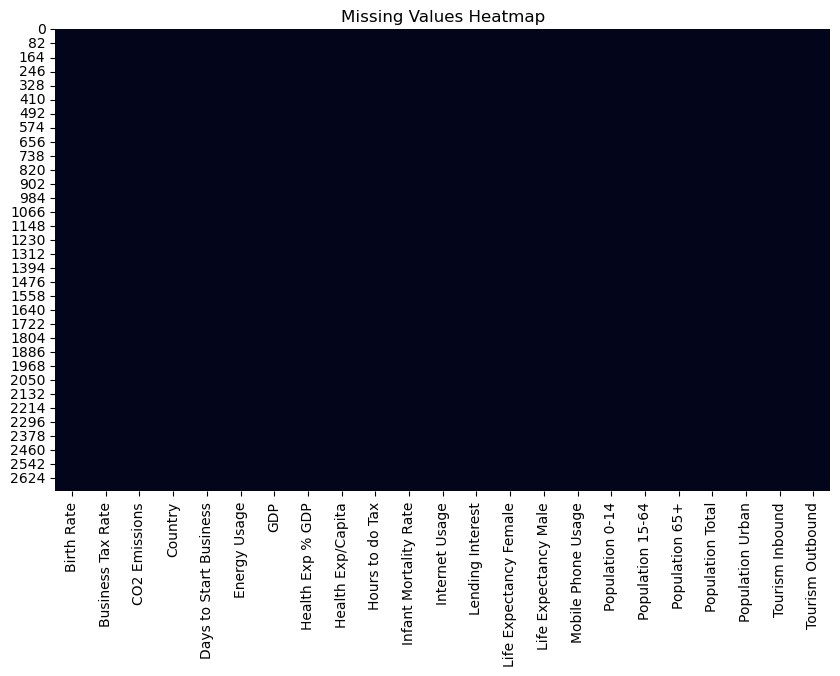

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

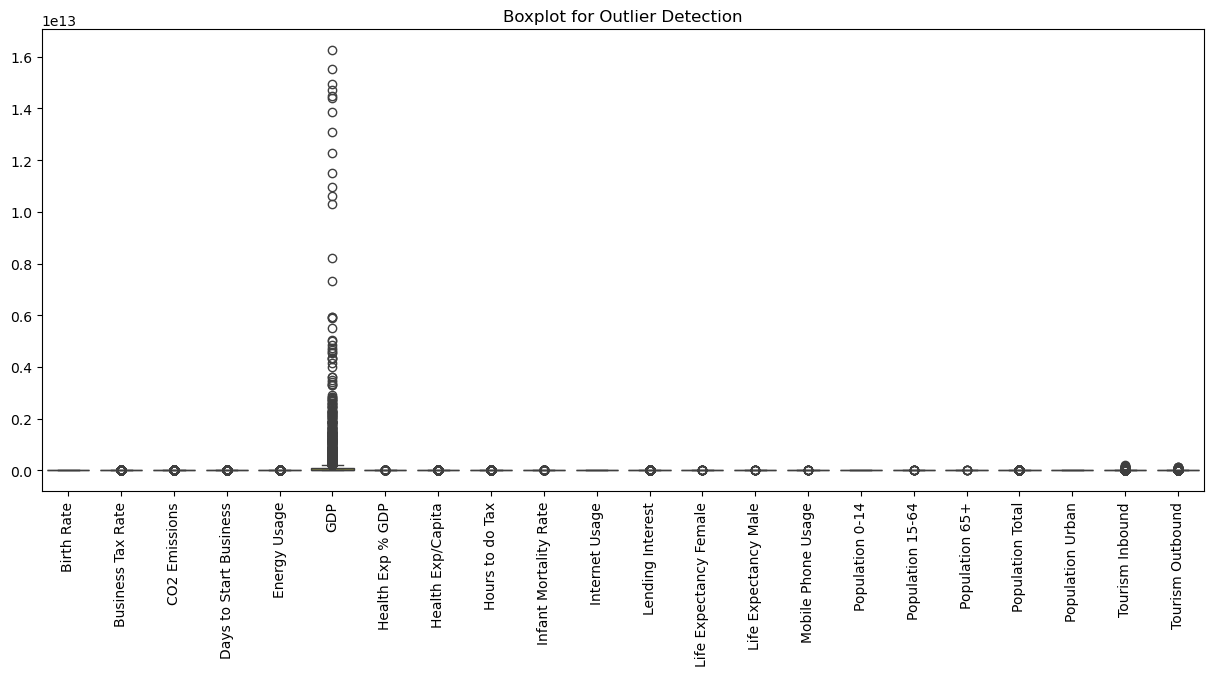

In [29]:
# a box plot to see outlier visually
plt.figure(figsize=(15,6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


In [30]:
# check and counting outliers columnwise
numerical_col = df.select_dtypes(include='number').columns

Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)
IQR = Q3 - Q1

outlier_counts = ((df[numerical_col] < (Q1 - 1.5 * IQR)) |
                  (df[numerical_col] > (Q3 + 1.5 * IQR))).sum()

outlier_counts


Birth Rate                   0
Business Tax Rate         1130
CO2 Emissions              387
Days to Start Business     340
Energy Usage               424
GDP                        414
Health Exp % GDP            58
Health Exp/Capita          412
Hours to do Tax            980
Infant Mortality Rate       49
Internet Usage               0
Lending Interest           245
Life Expectancy Female      14
Life Expectancy Male        11
Mobile Phone Usage          11
Population 0-14              0
Population 15-64             9
Population 65+               5
Population Total           318
Population Urban             0
Tourism Inbound            409
Tourism Outbound           461
dtype: int64

In [31]:
#Outlier Treatment
#Instead of removing outliers, capping (winsorization) is applied.

# using caping method to treat outlier
for col in numerical_col:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    df[col] = df[col].clip(lower, upper)

In [32]:
# checking outlier after treating it
after_outliers = ((df[numerical_col] < (Q1 - 1.5 * IQR)) |
                  (df[numerical_col] > (Q3 + 1.5 * IQR))).sum()

after_outliers.sort_values(ascending=False)

Birth Rate                0
Business Tax Rate         0
Tourism Inbound           0
Population Urban          0
Population Total          0
Population 65+            0
Population 15-64          0
Population 0-14           0
Mobile Phone Usage        0
Life Expectancy Male      0
Life Expectancy Female    0
Lending Interest          0
Internet Usage            0
Infant Mortality Rate     0
Hours to do Tax           0
Health Exp/Capita         0
Health Exp % GDP          0
GDP                       0
Energy Usage              0
Days to Start Business    0
CO2 Emissions             0
Tourism Outbound          0
dtype: int64

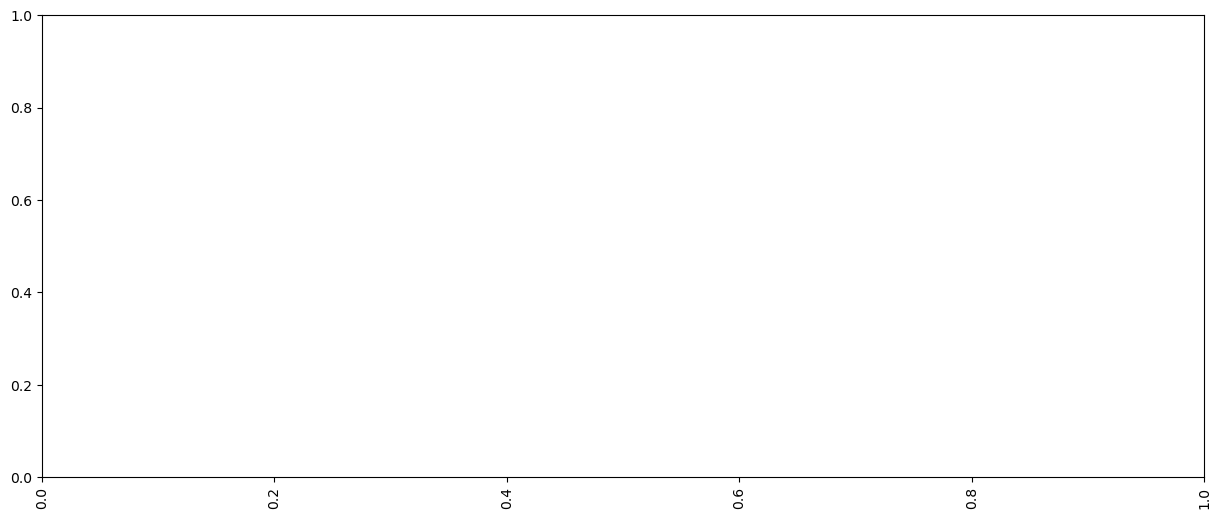

In [33]:
# checking outlier after treating it visually using box plot

plt.figure(figsize=(15,6))
sns.boxplot(df=df)
plt.xticks(rotation=90)
plt.show()

In [34]:
# check and counting outliers columnwise
Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numerical_col] < (Q1 - 1.5 * IQR)) |
            (df[numerical_col] > (Q3 + 1.5 * IQR))).sum()
outliers.sort_values(ascending=False)

Birth Rate                0
Business Tax Rate         0
Tourism Inbound           0
Population Urban          0
Population Total          0
Population 65+            0
Population 15-64          0
Population 0-14           0
Mobile Phone Usage        0
Life Expectancy Male      0
Life Expectancy Female    0
Lending Interest          0
Internet Usage            0
Infant Mortality Rate     0
Hours to do Tax           0
Health Exp/Capita         0
Health Exp % GDP          0
GDP                       0
Energy Usage              0
Days to Start Business    0
CO2 Emissions             0
Tourism Outbound          0
dtype: int64

In [35]:
#6. Separating Categorical and Numerical Columns
#df.drop(columns=['Ease of Business'], inplace=True, errors='ignore')

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Categorical: {cat_cols}")
print(f"Numerical: {num_cols}")

Categorical: ['Country']
Numerical: ['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Days to Start Business', 'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban', 'Tourism Inbound', 'Tourism Outbound']


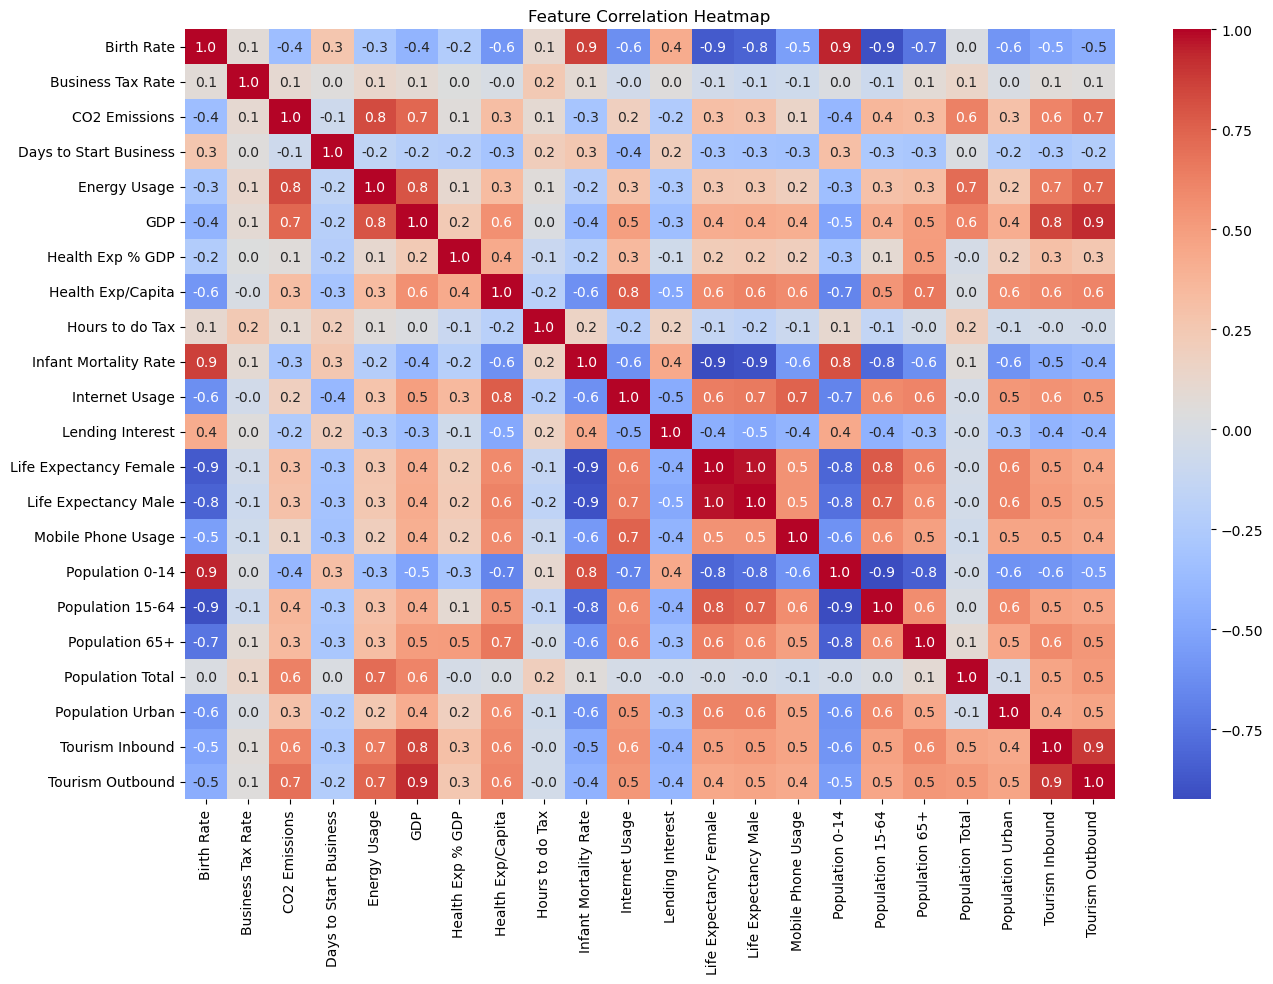

In [36]:
#Correlation Analysis (Heatmap)

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [37]:
#Feature Selection (After EDA)
X = df.drop(columns=['Country'], errors='ignore')


In [38]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


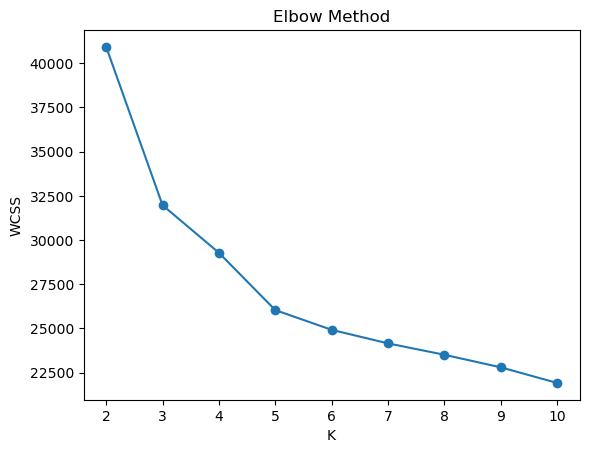

In [39]:
#KMeans Clustering
#Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(2,11), wcss, marker='o')
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [40]:
#Silhouette Score
from sklearn.metrics import silhouette_score

for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score}")


K=2, Silhouette Score=0.2586205704745409
K=3, Silhouette Score=0.25677007958366566
K=4, Silhouette Score=0.18268258998570694
K=5, Silhouette Score=0.19534697127142828
K=6, Silhouette Score=0.1624692832455722


In [41]:
#Final KMeans Model
kmeans_final = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans_final.fit_predict(X_scaled)


In [42]:
cluster_summary = df.groupby('KMeans_Cluster').mean(numeric_only=True)
cluster_summary


,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.017230,40.835501,17173.047639,26.536143,12389.623239,2.369929e+10,0.061616,391.065555,237.678749,0.017147,...,76.463132,70.645402,0.662303,0.264694,0.657350,0.076838,5.626071e+06,0.631248,1.094645e+09,5.639791e+08
1,0.013952,41.617241,72334.812808,22.804187,38235.846470,1.960480e+11,0.074299,871.737890,238.080049,0.010764,...,79.229885,73.655172,0.901888,0.206993,0.675319,0.117331,2.868855e+07,0.735831,5.435658e+09,3.714938e+09
2,0.035815,41.307489,10182.043919,33.979307,12564.180462,1.507126e+10,0.057223,68.095721,246.520270,0.064940,...,59.037162,56.260135,0.223986,0.420185,0.546426,0.033374,1.400239e+07,0.351475,3.436477e+08,3.134205e+08


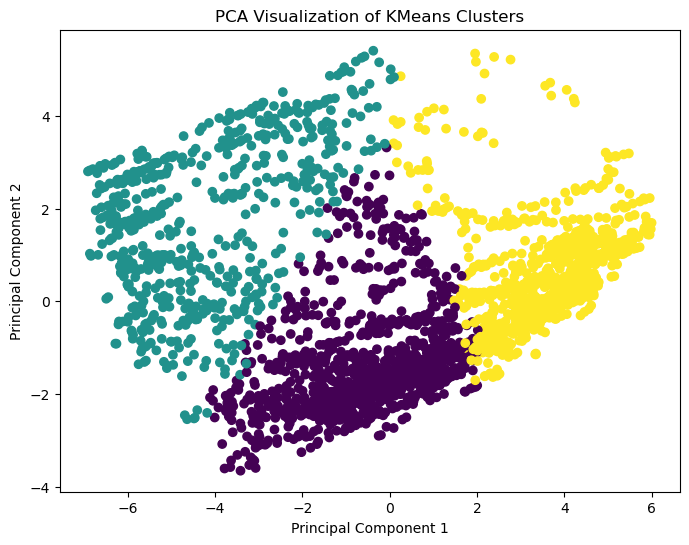

In [44]:
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Create cluster column
df['Cluster'] = kmeans.labels_

# -------------------------------
# 2. PCA for Visualization
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# -------------------------------
# 3. Plot PCA Clusters
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of KMeans Clusters")
plt.show()

In [45]:
#DBSCAN Clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(
    eps=1.5,        # starting value (tunable)
    min_samples=5   # minimum neighbors
)

df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

print("DBSCAN Cluster Counts:")
print(df['DBSCAN_Cluster'].value_counts())
      


DBSCAN Cluster Counts:
DBSCAN_Cluster
 1      724
-1      677
 9       31
 17      26
 82      24
       ... 
 42       5
 47       4
 45       4
 173      4
 177      3
Name: count, Length: 182, dtype: int64


In [46]:
len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'].values else 0)

181

In [47]:
dbscan_profile = (
    df.loc[df['DBSCAN_Cluster'] != -1]   # remove noise
      .select_dtypes(include='number')  # KEY LINE
      .groupby('DBSCAN_Cluster')
      .mean()
)

dbscan_profile


,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,KMeans_Cluster,Cluster
DBSCAN_Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.019600,41.000000,89020.800000,25.600000,28903.000000,6.389678e+10,0.036200,70.800000,239.000000,0.032000,...,0.020000,0.318800,0.640200,0.04100,3.258148e+07,0.615000,1.206000e+08,2.462000e+08,0.000000,0.000000
1,0.027377,41.177279,4539.816298,26.849793,11054.979282,8.140833e+09,0.058709,125.743094,240.743785,0.044604,...,0.339917,0.354140,0.592539,0.05207,5.616501e+06,0.488504,5.165928e+08,2.702144e+08,0.969613,0.969613
2,0.029400,41.000000,410.600000,26.000000,11497.000000,6.005774e+08,0.059200,46.800000,239.000000,0.076400,...,0.000000,0.398000,0.570400,0.03160,7.443828e+05,0.766200,7.860000e+06,1.186000e+07,2.000000,2.000000
3,0.024400,41.000000,103049.500000,30.400000,45419.375000,8.941802e+10,0.056400,68.400000,239.000000,0.031400,...,0.060000,0.341800,0.604000,0.05380,4.903473e+07,0.428800,4.788200e+09,1.354200e+09,1.200000,1.200000
4,0.042833,41.000000,4392.666667,30.666667,25357.666667,8.503045e+09,0.045167,5.500000,239.000000,0.086750,...,0.000000,0.465000,0.504667,0.03050,4.903473e+07,0.186000,3.610833e+08,1.271667e+08,2.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.028000,37.550000,3424.000000,37.800000,14338.000000,2.066135e+09,0.105600,111.800000,295.750000,0.077200,...,0.500000,0.376400,0.581000,0.04280,2.010411e+06,0.248000,3.200000e+07,2.658000e+08,2.000000,2.000000
177,0.019000,45.150000,14312.000000,11.000000,11172.000000,4.508123e+10,0.069000,294.333333,189.750000,0.014333,...,1.133333,0.233333,0.696667,0.07000,1.066680e+07,0.661000,2.979000e+09,6.540000e+08,0.000000,0.000000
178,0.010600,45.150000,103049.500000,28.200000,46913.625000,1.368223e+11,0.070000,205.400000,295.750000,0.011200,...,1.160000,0.140200,0.700000,0.15960,4.629586e+07,0.683200,4.944800e+09,3.818300e+09,1.000000,1.000000


In [48]:
mask = df['DBSCAN_Cluster'] != -1

if df.loc[mask, 'DBSCAN_Cluster'].nunique() > 1:
    score = silhouette_score(
        X_scaled[mask],
        df.loc[mask, 'DBSCAN_Cluster']
    )
    print("DBSCAN Silhouette Score:", score)
else:
    print("Silhouette score not applicable for DBSCAN")

DBSCAN Silhouette Score: 0.18173631640859947


In [49]:

# Imports
from sklearn.cluster import AgglomerativeClustering



In [50]:
#Hierarchical Clustering
hierarchical = AgglomerativeClustering(
    n_clusters=3,     # same as KMeans
    linkage='ward'    # best for numeric, Euclidean distance
)

df['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)
df['Hierarchical_Cluster'].value_counts()

Hierarchical_Cluster
0    1399
1     786
2     519
Name: count, dtype: int64

In [51]:
hierarchical_profile = (
    df
    .select_dtypes(include='number')
    .groupby(df['Hierarchical_Cluster'])
    .mean()
)

hierarchical_profile


,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,KMeans_Cluster,Cluster,DBSCAN_Cluster,Hierarchical_Cluster
Hierarchical_Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.017617,40.679878,22311.773410,26.703181,14449.601501,3.450982e+10,0.059593,391.527788,238.537169,0.019296,...,0.656515,0.074980,7.967929e+06,0.628422,1.287706e+09,7.729946e+08,0.267334,0.267334,40.646891,0.0
1,0.036986,41.441985,5200.850509,33.855757,11134.143130,1.019054e+10,0.059212,71.553435,242.478053,0.066147,...,0.540807,0.032748,1.163836e+07,0.344267,2.968159e+08,2.642884e+08,1.910941,1.910941,33.975827,1.0
2,0.014222,42.061368,74218.468208,23.356696,39365.065511,2.024905e+11,0.078075,885.135116,243.695087,0.011428,...,0.667395,0.121766,3.160160e+07,0.717516,5.591355e+09,3.723096e+09,0.980732,0.980732,45.433526,2.0


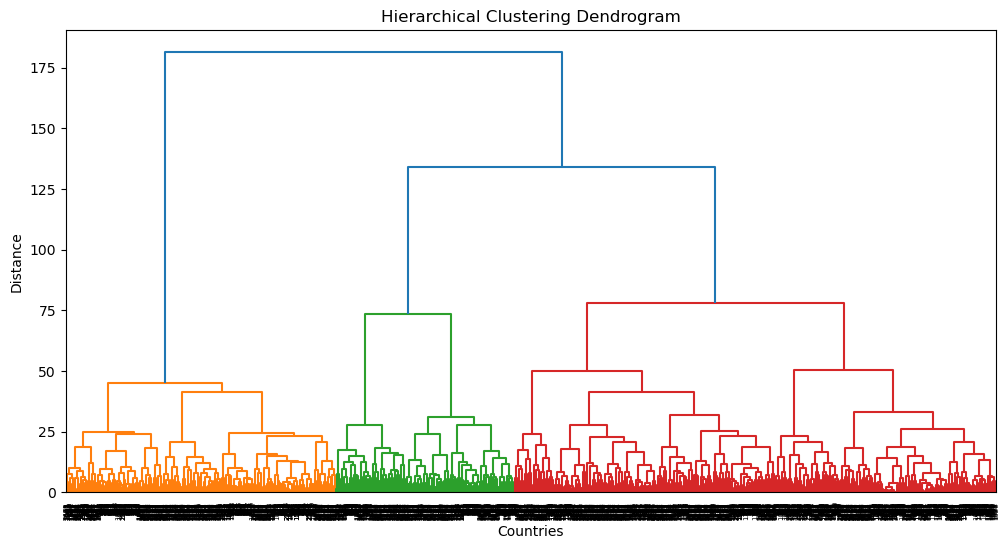

In [52]:
# Plot a dendrogram to visualize hierarchical clustering structure and choose the number of clusters
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# KMeans Model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit Model
kmeans.fit(X_scaled)

# Get Cluster Labels
kmeans_labels = kmeans.labels_

# Silhouette Score
kmeans_score = silhouette_score(X_scaled, kmeans_labels)

print("KMeans Silhouette Score:", kmeans_score)


KMeans Silhouette Score: 0.25677007958366566


In [60]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# -------------------- KMeans --------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_score = silhouette_score(X_scaled, kmeans_labels)

# -------------------- Hierarchical --------------------
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(X_scaled)
hc_score = silhouette_score(X_scaled, hc_labels)

# -------------------- Gaussian Mixture --------------------
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_score = silhouette_score(X_scaled, gmm_labels)

# -------------------- BIRCH --------------------
birch = Birch(n_clusters=3)
birch_labels = birch.fit_predict(X_scaled)
birch_score = silhouette_score(X_scaled, birch_labels)

# -------------------- DBSCAN --------------------
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# DBSCAN me noise (-1) remove karna padta hai
if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):
    dbscan_score = silhouette_score(X_scaled, dbscan_labels)
else:
    dbscan_score = np.nan

# -------------------- Comparison Table --------------------
silhouette_scores = {
    "KMeans": kmeans_score,
    "Hierarchical": hc_score,
    "Gaussian Mixture Model": gmm_score,
    "BIRCH": birch_score,
    "DBSCAN": dbscan_score
}

comparison_df = pd.DataFrame(
    list(silhouette_scores.items()),
    columns=["Clustering Model", "Silhouette Score"]
)

comparison_df = comparison_df.sort_values(by="Silhouette Score", ascending=False)

print(comparison_df)


         Clustering Model  Silhouette Score
0                  KMeans          0.256770
3                   BIRCH          0.240035
1            Hierarchical          0.233073
2  Gaussian Mixture Model          0.158696
4                  DBSCAN               NaN


In [61]:
# Compare silhouette scores of clustering models and select the best-performing model
import pandas as pd
import numpy as np

# Store scores in a dictionary
silhouette_scores = {
    "KMeans": kmeans_score,
    "Hierarchical": hc_score,
    "Gaussian Mixture Model": gmm_score,
    "Grid-Based (BIRCH)": birch_score,
    "DBSCAN": dbscan_score if dbscan_score is not None else np.nan
}

# Create comparison table
comparison_df = pd.DataFrame(
    list(silhouette_scores.items()),
    columns=["Clustering Model", "Silhouette Score"]
)

# Sort by best score
comparison_df = comparison_df.sort_values(
    by="Silhouette Score",
    ascending=False
).reset_index(drop=True)

print(comparison_df)

# Select best model
best_model = comparison_df.iloc[0]

print("\n✅ Best Performing Model:")
print("Model:", best_model["Clustering Model"])
print("Silhouette Score:", best_model["Silhouette Score"])


         Clustering Model  Silhouette Score
0                  KMeans          0.256770
1      Grid-Based (BIRCH)          0.240035
2            Hierarchical          0.233073
3  Gaussian Mixture Model          0.158696
4                  DBSCAN               NaN

✅ Best Performing Model:
Model: KMeans
Silhouette Score: 0.25677007958366566


In [62]:
# Save trained models and scaler
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans, "kmeans.pkl")
joblib.dump(gmm, "gmm.pkl")
joblib.dump(birch, "birch.pkl")

print("Models saved successfully")


Models saved successfully
